In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu May  7 14:15:54 2020

@author: NDH00360
"""
import sklearn
import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler 

import pickle


from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [85]:
'''
This is the program for prediciton of category of attack from UNSW dataset

'''
df=pd.read_csv(r"features_having_most_influence_on_UNSW.csv")
#df=df[:200000]



## We will drop all the unnessary column 
df1=df.drop(['pkSeqID','sport','dport'], axis=1)


## We use label encoder to encode categorical data
lb_make = LabelEncoder()
df1['subcategory'] = lb_make.fit_transform(df1['subcategory'])
df1['saddr'] = lb_make.fit_transform(df1['saddr'])
df1['daddr'] = lb_make.fit_transform(df1['daddr'])
df1['proto'] = lb_make.fit_transform(df1['proto'])




replace_map = {'category': {'DoS': 1, 'DDoS': 2, 'Normal': 3, 'Theft': 4,'Reconnaissance':5}}

df1.replace(replace_map, inplace=True)


##saving in different dataframe
df2=df1

##obtaining test and train set
X = df2.drop('category', axis=1)
y = df2['category']
X1 = df2.drop('category', axis=1)



## scalling data for faster traning set and accuray on SVM poko
scaler = StandardScaler()

X=scaler.fit_transform(X)









In [33]:
df['saddr'].nunique()
df['saddr'].unique()


array(['192.168.100.150', '192.168.100.148', '192.168.100.149',
       '192.168.100.147', '192.168.100.5', '192.168.100.3',
       '192.168.100.6', '192.168.100.7', '192.168.100.46',
       'fe80::250:56ff:febe:e9d9', 'fe80::250:56ff:febe:bf1a',
       'fe80::c0c0:aa20:45b9:bdd9', '192.168.100.1', '192.168.100.4',
       'fe80::250:56ff:febe:254', '192.168.100.27'], dtype=object)

In [34]:
df['daddr'].nunique()


45

In [35]:
df['proto'].unique()


array(['udp', 'tcp', 'icmp', 'arp', 'ipv6-icmp'], dtype=object)

In [36]:
df['dport'].nunique()


4111

In [37]:
df['sport'].nunique()

65538

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


In [39]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [40]:
print(type(X))

<class 'numpy.ndarray'>


In [41]:
relevence_scores=(model.feature_importances_)
print((relevence_scores))


[3.19852386e-02 5.92986560e-02 3.16965422e-01 2.97896782e-02
 5.69780146e-02 2.42051799e-02 6.09527779e-02 2.93330757e-02
 6.71753702e-02 1.17421702e-01 4.74559998e-03 7.31204107e-02
 7.25198484e-02 2.34050050e-04 5.52749761e-02]


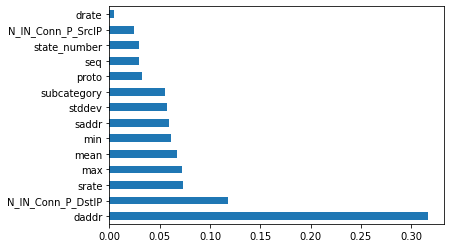

In [42]:
feat_importances = pd.Series(model.feature_importances_, index=X1.columns)
feat_importances.nlargest(14).plot(kind='barh')
plt.show()

In [44]:
svclassifier = SVC(kernel='poly')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [45]:
##Saving the model into pickle file
filename = 'UNSW_SVM_model.sav'
pickle.dump(svclassifier, open(filename, 'wb'))

In [46]:
y_pred = svclassifier.predict(X_test)



from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[65865   139     0     1     0]
 [  409 76700     0     0     0]
 [    0     0    22     0     0]
 [    0     0     0     4     0]
 [    0     0     0     0  3601]]
              precision    recall  f1-score   support

           1       0.99      1.00      1.00     66005
           2       1.00      0.99      1.00     77109
           3       1.00      1.00      1.00        22
           4       0.80      1.00      0.89         4
           5       1.00      1.00      1.00      3601

    accuracy                           1.00    146741
   macro avg       0.96      1.00      0.98    146741
weighted avg       1.00      1.00      1.00    146741



In [47]:
##Loadning the pickle file

loaded_model = pickle.load(open('UNSW_SVM_model.sav', 'rb'))

#df_test=pd.read_csv(r"C:\Users\NDH00360\Desktop\TestExe\features_having_most_influence_on_UNSW.csv")

result = loaded_model.score(X_test, y_test)
print("Overall score=",result)

Overall score= 0.9962587143334174


In [49]:
146741*5

733705

In [50]:
df.shape

(733705, 19)

In [51]:
sklearn.metrics.accuracy_score(y_test,y_pred)

0.9962587143334174

In [88]:
transformed = pd.DataFrame(X, columns =X1.columns)

In [89]:
transformed.head()

,proto,saddr,daddr,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,subcategory
0,0.896043,1.302673,-0.667194,0.707977,-0.822264,0.716751,2.076200,0.729019,1.465469,0.41569,-0.006811,-0.004605,0.911708,0.012077,0.843291
1,-1.049722,-0.422693,-0.667194,0.285020,-0.542151,0.716751,1.630732,-1.799584,1.036355,0.41569,-0.003783,-0.004613,0.763106,0.012077,-0.866815
2,0.896043,0.439990,-0.667194,0.601664,1.298064,-0.388623,-0.686460,0.729019,0.328007,0.41569,-0.006811,-0.004599,0.599473,0.012077,0.843291
3,-1.049722,-0.422693,-0.667194,1.097316,-0.571006,-1.084599,1.517646,-1.799584,0.917913,0.41569,-0.006811,-0.004756,0.648511,0.012077,-0.866815
4,-1.049722,0.439990,0.636060,-1.072952,1.455808,0.716751,-0.686460,-0.113849,-0.688615,0.41569,-0.006811,-0.005271,0.930083,0.012077,-0.866815


In [90]:
X1.head()

,proto,saddr,daddr,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,subcategory
0,4,4,12,175094,0.226784,100,4.100436,4,4.457383,100,0.000000,0.404711,4.719438,1,6
1,3,2,12,143024,0.451998,100,3.439257,1,3.806172,100,0.225077,0.401397,4.442930,1,5
2,4,3,12,167033,1.931553,73,0.000000,4,2.731204,100,0.000000,0.407287,4.138455,1,6
3,3,2,12,204615,0.428798,56,3.271411,1,3.626428,100,0.000000,0.343654,4.229700,1,5
4,3,3,14,40058,2.058381,100,0.000000,3,1.188407,100,0.000000,0.135842,4.753628,1,5
